In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

In [2]:
data_2019 = pd.read_csv(r"D:\PPP\Thesis\Database\CSV format data by python\PPI data2019.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#drop the first and the second column
data_2019.drop(data_2019.columns[[0, 1]], axis=1, inplace=True)
#dataset to draw the figure 1
new_data_2019 = data_2019.copy()
#drop 'fee', 'physical', and 'investment'
data_2019.drop(columns=['fees', 'physical', 'investment'], inplace=True)

In [4]:
#combine the project with the same ID, which is the same project, the 'investment_real', 'realphysicalassets', and 'realfeestogovernment'
#will be added, while other column will be not changed based on the first project.
number_of_ID = data_2019.ID.value_counts()
number_larger_than1 = number_of_ID[number_of_ID > 1]
number_of_nonunique_ID = number_larger_than1.index.values
new_data = data_2019.copy()

delete_index = []
for id in number_of_nonunique_ID:
    data_i = data_2019[data_2019.ID == id]
    data_i.sort_values(by=['IY'])
    newlist = list(data_i.iloc[1:].index.values)
    delete_index.extend(newlist)
    
delete_index

new_data.drop([i for i in delete_index], inplace=True)
new_data = new_data.loc[new_data.PPP == 'PPP Project']

new_data.shape

(7096, 68)

In [6]:
new_data.Region.unique()

array(['LAC', 'EAP', 'MENA', 'ECA', 'AFR', 'SAR'], dtype=object)

In [6]:
new_data.regionname.unique()

array(['Latin America and Caribbean', 'East Asia and Pacific',
       'Middle East and North Africa', 'Europe and Central Asia',
       'Sub-Saharan Africa', 'South Asia', nan], dtype=object)

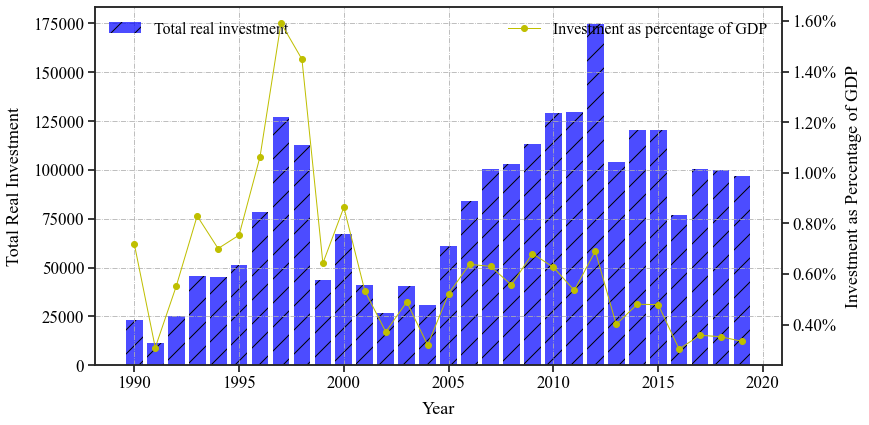

In [119]:
#figure 1
import matplotlib.pyplot as plt

year_investment = new_data_2019.groupby('IY')['investment_real'].sum()
investment = new_data_2019.groupby('IY')['investment'].sum()

GDP = new_data_2019.groupby(['IY', 'country'])['GDP'].mean()
GDP = GDP.groupby('IY').sum() / 1000000

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(111)
ax1.bar(np.arange(1990, 2020), year_investment, color='blue', alpha = 0.7, hatch='/', label='Total real investment')
ax1.set_xlabel("Year", fontsize=18, fontname='times new roman', labelpad=10)
ax1.set_ylabel("Total Real Investment", fontsize=18, fontname='times new roman', labelpad=10)

ax1.grid(linestyle='-.')
ax1.legend(loc=2, frameon=False, prop={'family':'Times new roman', 'size':16})

ax1.tick_params(axis='both', length=7, labelsize=17, width=1.5, color='black')
ax1.spines["top"].set_linewidth(1.5)
ax1.spines["bottom"].set_linewidth(1.5)
ax1.spines["left"].set_linewidth(1.5)
ax1.spines["right"].set_linewidth(1.5)

labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]


ax2 = ax1.twinx()
ax2.plot(investment/GDP*100, c='y', marker='.', linewidth=1, markersize=12, label="Investment as percentage of GDP")
ax2.set_ylabel("Investment as Percentage of GDP", fontsize=18, fontname='times new roman', labelpad=10)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(loc=0, frameon=False, prop={'family':'Times new roman', 'size':16})

labels = ax2.get_xticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax2.tick_params(axis='both', length=7, labelsize=17, width=1.5, color='black')
ax2.spines["top"].set_linewidth(1.5)
ax2.spines["bottom"].set_linewidth(1.5)
ax2.spines["left"].set_linewidth(1.5)
ax2.spines["right"].set_linewidth(1.5)

plt.subplots_adjust(left=0.105, right=0.9, top=0.95, bottom=0.12)

plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\1.png", dpi=1000)

In [5]:
import geopandas as gpd
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch

# the project that are cancelled or Distressed
cancelled_project = new_data.loc[(new_data['status_n'] == 'Cancelled') | (new_data['status_n'] == 'Distressed')]
data_for_draw_map = cancelled_project.groupby('countrycode')['status_n'].count()
#extract the data from dataset to draw the map, including 'countrycode' and 'status_n'
data = pd.Series.to_frame(data_for_draw_map).reset_index()

In [6]:
#import world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#drop the used columns in world dataset
world.drop(columns=['pop_est', 'continent', 'name', 'gdp_md_est'], inplace=True)
# merge the extracted data and the world map data
for_plotting = world.merge(data, how='left', left_on='iso_a3', right_on='countrycode')
for_plotting.drop(columns=['countrycode'], inplace=True)
for_plotting.status_n.fillna(0, inplace=True)
for_plotting.status_n = for_plotting.status_n.astype(int)

In [7]:
new_data.groupby(['sector','ssector']).size()

sector                 ssector                 
Energy                 Electricity                 3289
                       Natural Gas                  310
ICT                    Telecom                      134
Municipal Solid Waste  Collection and Transport      93
                       Integrated MSW                47
                       Treatment/ Disposal          278
Transport              Airports                     158
                       Railroads                    140
                       Seaports                     431
                       Toll Roads                  1164
Water and sewerage     Treatment plant              659
                       Water Utility                393
dtype: int64

In [8]:
projects_by_country = new_data['countrycode'].to_frame()
projects_by_country = projects_by_country.groupby('countrycode').size().to_frame()
# merge the extracted data and the world map data
for_plotting_2 = world.merge(projects_by_country, how='left', left_on='iso_a3', right_on='countrycode')
world

,iso_a3,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [11]:
for_plotting_2.columns = ['iso_a3', 'geometry', 'number']
for_plotting_2.number.fillna(0, inplace=True)
for_plotting_2.sort_values(by = 'number', ascending=True)

,iso_a3,geometry,number
88,OMN,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...",0.0
129,BEL,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...",0.0
128,LUX,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",0.0
127,CHE,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",0.0
126,HRV,"POLYGON ((16.56481 46.50375, 16.88252 46.38063...",0.0
...,...,...,...
9,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",207.0
27,MEX,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",328.0
29,BRA,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",964.0
98,IND,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",1041.0


C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Anaconda\lib\site-packages\mapclassify\classifiers.py:239: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)


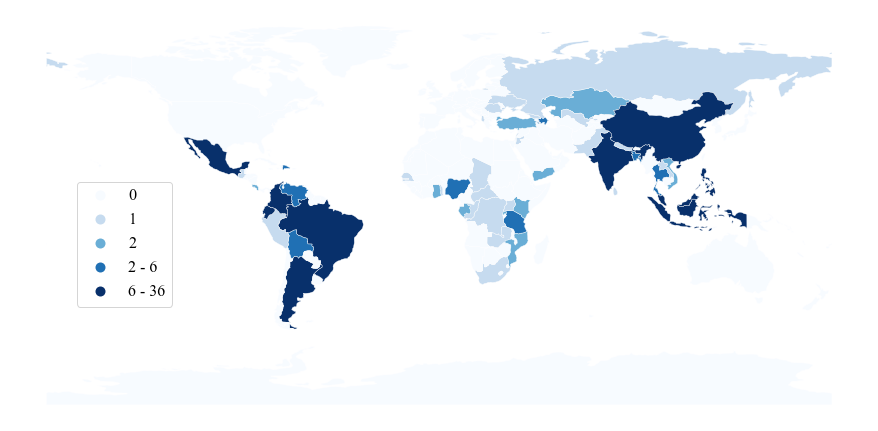

In [65]:
fig = plt.figure(figsize=(15, 9))

plt.rcParams['font.family'] = 'Times new roman'
plt.rcParams.update({'font.size': 16})
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.12)

ax = fig.add_subplot(111)

for_plotting.dropna().plot(column='status_n', ax = ax, cmap='Blues', scheme='quantiles',linewidth=0.4, edgecolor='white', k=18, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((.2, .6))
new_labels=[
            '0',
            '1',
            '2',
            '2 - 6',
            '6 - 36'
]

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)

plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\2.png", dpi=1000)

In [1]:
fig = plt.figure(figsize=(15, 9))

plt.rcParams['font.family'] = 'Times new roman'
plt.rcParams.update({'font.size': 16})
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.12)

ax = fig.add_subplot(111)

for_plotting_2.plot(column='number', ax = ax, cmap='Greens', scheme='quantiles',linewidth=0.4, edgecolor='white', k=15, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((.2, .8))

new_labels=[
            'Missing information',
            '1',
            '2',
            '3',
            '3 - 5',
            '5 - 7',
            '7 - 12',
            '12 - 24',
            '24 - 40',
            '40 - 112',
            '112 - 1723' 
]

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)


#plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\11.png", dpi=1000)

NameError: name 'plt' is not defined

In [9]:
# draw the distribution of duaration between financial closure and the cancellation 
distribution_of_duration = cancelled_project.copy()
distribution_of_duration.FCY = pd.to_datetime(distribution_of_duration.FCY, format='%Y')
distribution_of_duration.DSU = pd.to_datetime(distribution_of_duration.DSU)

In [10]:
distribution_of_duration.dropna(subset=['FCY', 'DSU'], inplace=True)

In [11]:
distribution_of_duration['Duration'] = (distribution_of_duration.DSU - distribution_of_duration.FCY) / np.timedelta64(1,'Y')

In [12]:
distribution_of_duration['Duration'].astype('float')

5       7.000828
8       7.000828
12      7.000828
15      7.581265
16      7.000828
          ...   
7480    1.916535
7506    3.414170
7641    1.664647
7834    3.455239
9369    0.292956
Name: Duration, Length: 227, dtype: float64

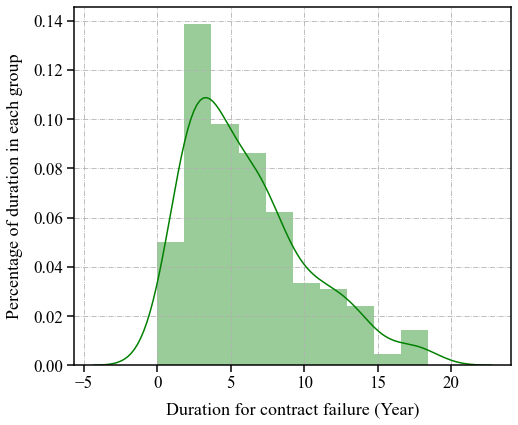

In [71]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sns.distplot(distribution_of_duration.Duration, bins=10, color='green')

ax.grid(linestyle='-.')
ax.tick_params(axis='both', length=7, labelsize=17, width=1.5, color='black')
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
    
#ax.legend(loc=2, frameon=False, prop={'family':'times new roman', 'size':14})
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

ax.set_xlabel('Duration for contract failure (Year)', fontsize=18, fontname='times new roman', labelpad=10)
ax.set_ylabel('Percentage of duration in each group', fontsize=18, fontname='times new roman', labelpad=10)

plt.subplots_adjust(left=0.12, right=0.88, top=0.95, bottom=0.12)
plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\3.png", dpi=1000)

In [13]:
distribution_of_duration.Duration.describe()

count    227.000000
mean       6.081265
std        4.048796
min        0.000000
25%        2.747490
50%        5.087031
75%        8.247945
max       18.415163
Name: Duration, dtype: float64

In [14]:
distribution_of_duration.Duration.mode()

0    1.916535
dtype: float64

In [18]:
new_data.shape

(7096, 68)

In [19]:
data_status = new_data.dropna(subset=['status_n'])
data_status.shape

(7096, 68)

In [20]:
data_status.groupby('status_n').size()/7096

status_n
Active        0.933766
Cancelled     0.030440
Concluded     0.027339
Distressed    0.008455
dtype: float64

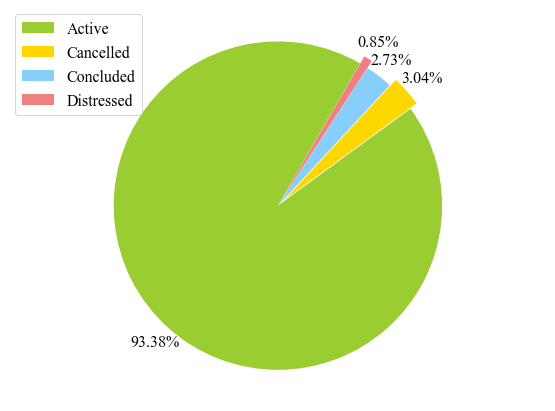

In [69]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

plt.rcParams['font.family'] = 'Times new roman'
plt.rcParams.update({'font.size': 16})

labels = ['Active', 'Cancelled', 'Concluded', 'Distressed']
sizes = [93.38, 3.04, 2.73, 0.85]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.05, 0, 0.05) 
patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, shadow=False, startangle=60, autopct='%1.2f%%',
                                   pctdistance=1.12)
plt.legend(patches, labels, loc="best")

plt.axis('equal')
plt.subplots_adjust(left=0.31, right=0.88, top=0.95, bottom=0.12)

plt.tight_layout()
plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\4.png", dpi=1000)

In [15]:
all_data_with_FCY_DSU = new_data.dropna(subset=['FCY', 'DSU'])
all_data_with_FCY_DSU.shape

(4859, 68)

In [16]:
new_data.FCY = pd.to_datetime(new_data.FCY, format='%Y')
new_data.DSU = pd.to_datetime(new_data.DSU)
cancel_project = new_data.loc[new_data['status_n'] == 'Cancelled']
distress_project = new_data.loc[new_data['status_n'] == 'Distressed']
concluded_project = new_data.loc[new_data['status_n'] == 'Concluded']
active_project = new_data.loc[new_data['status_n'] == 'Active']

In [17]:
cancel_project['Duration'] = (cancel_project.DSU - cancel_project.FCY) / np.timedelta64(1,'Y')
distress_project['Duration'] = (distress_project.DSU - distress_project.FCY) / np.timedelta64(1,'Y')
concluded_project['Duration'] = (concluded_project.DSU - concluded_project.FCY) / np.timedelta64(1,'Y')
active_project['Duration'] = (active_project.DSU - active_project.FCY) / np.timedelta64(1,'Y')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

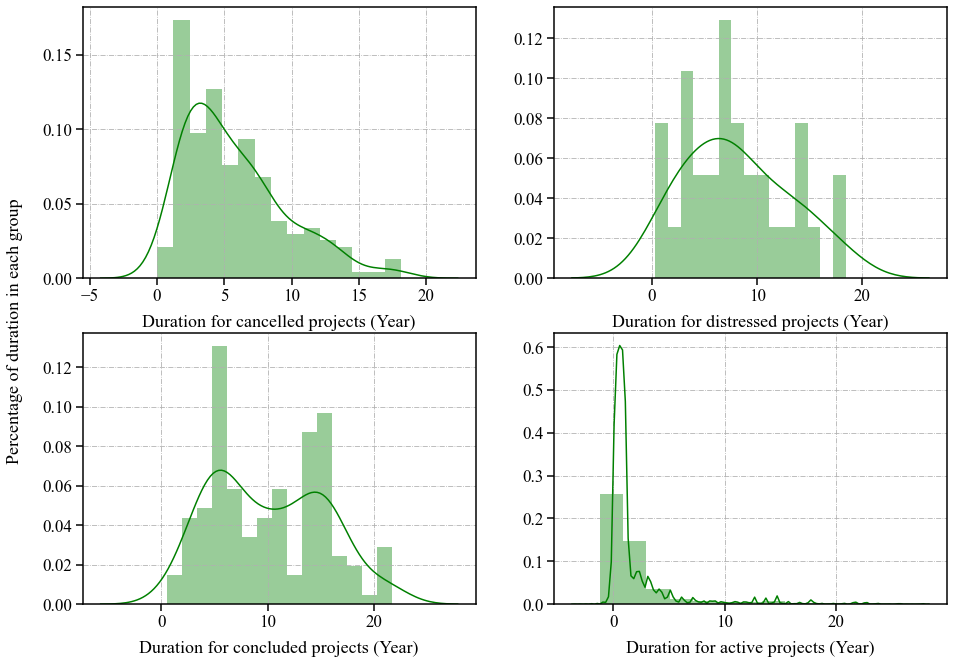

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.text(0.03, 0.5, 'Percentage of duration in each group', va='center', rotation='vertical', fontsize=18)

ax1 = ax[0, 0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]

sns.distplot(cancel_project.Duration, ax=ax1, bins=15, color='green')
sns.distplot(distress_project.Duration, ax=ax2, bins=15, color='green')
sns.distplot(concluded_project.Duration, ax=ax3, bins=15, color='green')
sns.distplot(active_project.Duration, ax=ax4, bins=15, color='green')

for subplotlist in ax:
    for subplot in subplotlist:
        subplot.grid(linestyle='-.')
        subplot.tick_params(axis='both', length=7, labelsize=17, width=1.5, color='black')
        subplot.spines["top"].set_linewidth(1.5)
        subplot.spines["bottom"].set_linewidth(1.5)
        subplot.spines["left"].set_linewidth(1.5)
        subplot.spines["right"].set_linewidth(1.5)
    
        #subplot.legend(loc=2, frameon=False, prop={'family':'times new roman', 'size':14})
        labels = subplot.get_xticklabels() + subplot.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]

ax1.set_xlabel('Duration for cancelled projects (Year)', fontsize=18, fontname='times new roman', labelpad=10)
ax2.set_xlabel('Duration for distressed projects (Year)', fontsize=18, fontname='times new roman', labelpad=10)
ax3.set_xlabel('Duration for concluded projects (Year)', fontsize=18, fontname='times new roman', labelpad=10)
ax4.set_xlabel('Duration for active projects (Year)', fontsize=18, fontname='times new roman', labelpad=10)

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.12)

#plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\5.png", dpi=1000)

In [18]:
print(cancel_project.Duration.mean())
print(distress_project.Duration.mean())
print(concluded_project.Duration.mean())
print(active_project.Duration.mean())

5.7589557201458925
8.045339740035729
10.082436317173775
1.927252169056621


In [24]:
#Get all projects that are non-active status
cancel_project = new_data.loc[new_data['status_n'] == 'Cancelled']
distress_project = new_data.loc[new_data['status_n'] == 'Distressed']
concluded_project = new_data.loc[new_data['status_n'] == 'Concluded']

In [25]:
all_selected_projects.groupby('status_n').size()

NameError: name 'all_selected_projects' is not defined

In [26]:
new_data.groupby('status_n').size()

status_n
Active        6626
Cancelled      216
Concluded      194
Distressed      60
dtype: int64

In [27]:
#get all projects that achieve a FCY before year_end
year_end = pd.to_datetime(20140105,format='%Y%m%d')
#drop the corresponding rows
all_selected_projects = new_data.drop(new_data[(new_data['status_n'] == 'Active') & (new_data['FCY'] > year_end)].index)
#convert the index to column name
converted_data = all_selected_projects.groupby(['FCY', 'status_n'])['ID'].count().unstack()

converted_data.fillna(0, inplace=True)
converted_data['total_num'] = converted_data.Active + converted_data.Cancelled + converted_data.Concluded + converted_data.Distressed
converted_data['contract_failure'] = converted_data.Cancelled + converted_data.Distressed
converted_data['contract_cancellation'] = (converted_data.Cancelled + converted_data.Distressed) / converted_data.total_num
converted_data['total_cum_num'] = converted_data['total_num'].cumsum()
converted_data['contract_cum_failure'] = converted_data['contract_failure'].cumsum()
converted_data['cum_failure_rate'] = converted_data['contract_cum_failure'] / converted_data['total_cum_num']

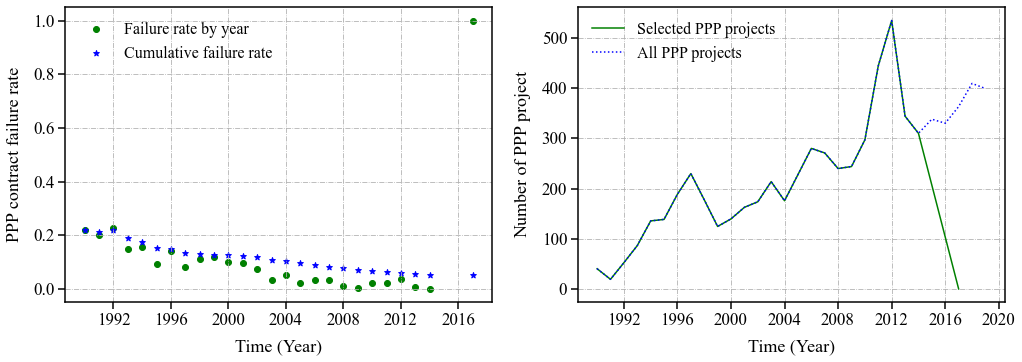

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(converted_data.index, converted_data.contract_cancellation, c='green', label='Failure rate by year')
ax1.scatter(converted_data.index, converted_data['cum_failure_rate'], c='blue', marker="*", label='Cumulative failure rate')
ax2.plot(converted_data.total_num, c='green', label='Selected PPP projects')
ax2.plot(new_data.groupby('FCY').size(), c='blue', linestyle=':', label='All PPP projects')

for subplot in ax:
    subplot.grid(linestyle='-.')
    subplot.tick_params(axis='both', length=7, labelsize=17, width=1.5, color='black')
    subplot.spines["top"].set_linewidth(1.5)
    subplot.spines["bottom"].set_linewidth(1.5)
    subplot.spines["left"].set_linewidth(1.5)
    subplot.spines["right"].set_linewidth(1.5)
    
    subplot.legend(loc=2, frameon=False, prop={'family':'times new roman', 'size':16})
    labels = subplot.get_xticklabels() + subplot.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]


ax1.set_xlabel('Time (Year)', fontsize=18, fontname='times new roman', labelpad=10)
ax1.set_ylabel('PPP contract failure rate', fontsize=18, fontname='times new roman', labelpad=10)

ax2.set_xlabel('Time (Year)', fontsize=18, fontname='times new roman', labelpad=10)
ax2.set_ylabel('Number of PPP project', fontsize=18, fontname='times new roman', labelpad=10)


plt.subplots_adjust(left=0.08, right=0.95, top=0.97, bottom=0.15)
plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\6.png", dpi=1000)

In [28]:
converted_data_1 = converted_data.copy()
converted_data_2 = converted_data_1['contract_failure']
time = np.arange(1990, 2018)
number = {'number': np.zeros(len(time))
    
}
time_dataframe = pd.DataFrame(number, columns=['time'], index=time)
converted_data_3 = converted_data_2.to_frame().set_index(converted_data_2.to_frame().index.strftime("%Y"))
converted_data_3.index = converted_data_3.index.astype(int)
new_frame = time_dataframe.merge(converted_data_3, how='left', left_index=True, right_index=True)
new_frame.drop(columns=['time'], inplace=True)
new_frame.fillna(0, inplace=True)

In [29]:
from collections import Counter
import pymc3 as pm

experience_by_project = all_selected_projects[['country', 'FCY', 'status_n']]

country_list = experience_by_project.country.unique()
result = []
for cou in country_list:
    experience_country_1 = experience_by_project[experience_by_project.country == cou]
    experience_country_1.set_index(np.arange(1, experience_country_1.shape[0] + 1), inplace=True)
    
    result.append(experience_country_1.loc[(experience_country_1.status_n == 'Cancelled')| (experience_country_1.status_n == 'Distressed')].index.values)

result = pd.DataFrame(result)
result_transposed = result.T
result_list = []
for col in np.arange(0, result_transposed.shape[1]):
    new_list = result_transposed[result_transposed.columns[col]].to_list()
    result_list.append(new_list)

result_1 = [item for sublist in result_list for item in sublist]
result_2 = [x for x in result_1 if str(x) != 'nan']

result_2.sort()
final_result = pd.DataFrame(Counter(result_2).values(), Counter(result_2).keys())
final_result.columns = ['result']

years = final_result.index.values.astype(int)
input_value = final_result.result.values.astype(int)

In [30]:
from collections import Counter
import pymc3 as pm

experience_by_project = all_selected_projects[['country', 'FCY', 'status_n']]

country_list = experience_by_project.country.unique()
result = []
for cou in country_list:
    experience_country_1 = experience_by_project[experience_by_project.country == cou]
    experience_country_1.set_index(np.arange(1, experience_country_1.shape[0] + 1), inplace=True)
    
    result.append(experience_country_1.loc[(experience_country_1.status_n == 'Cancelled')| (experience_country_1.status_n == 'Distressed') | (experience_country_1.status_n == 'Concluded') | (experience_country_1.status_n == 'Active')].index.values)

result = pd.DataFrame(result)
result_transposed = result.T
result_list = []
for col in np.arange(0, result_transposed.shape[1]):
    new_list = result_transposed[result_transposed.columns[col]].to_list()
    result_list.append(new_list)

result_1 = [item for sublist in result_list for item in sublist]
result_2 = [x for x in result_1 if str(x) != 'nan']

result_2.sort()
final_result = pd.DataFrame(Counter(result_2).values(), Counter(result_2).keys())
final_result.columns = ['result']

years1 = final_result.index.values.astype(int)
input_value1 = final_result.result.values.astype(int)

In [54]:
final_result

,result
1.0,20
2.0,9
3.0,8
4.0,5
5.0,3
...,...
687.0,1
690.0,1
695.0,1
703.0,1


In [101]:
with pm.Model() as disaster_model:

    switchpoint1 = pm.DiscreteUniform('switchpoint1', lower=years.min(), upper=years.max())
    switchpoint2 = pm.DiscreteUniform('switchpoint2', switchpoint1, upper=years.max())

    # Priors for pre- and post-switch rates number of disasters
    rate_1 = pm.Exponential('rate_1', 0.8)
    rate_2 = pm.Exponential('rate_2', 0.6)
    rate_3 = pm.Exponential('rate_3', 0.2)

    # Allocate appropriate Poisson rates to years before and after current
    rate = pm.math.switch(switchpoint2 >= years, pm.math.switch(switchpoint1 >= years, rate_1, rate_2), rate_3)

    disasters = pm.Poisson('disasters', rate, observed=input_value)

with disaster_model:
    trace = pm.sample(3000, chains=3, tune=1500)

Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [switchpoint2]
>>Metropolis: [switchpoint1]
>NUTS: [rate_3, rate_2, rate_1]
Sampling 3 chains, 0 divergences: 100%|█| 13500/13500 [00:31<00:00, 422.87draws/s]
The number of effective samples is smaller than 10% for some parameters.


C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Anaconda\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\A

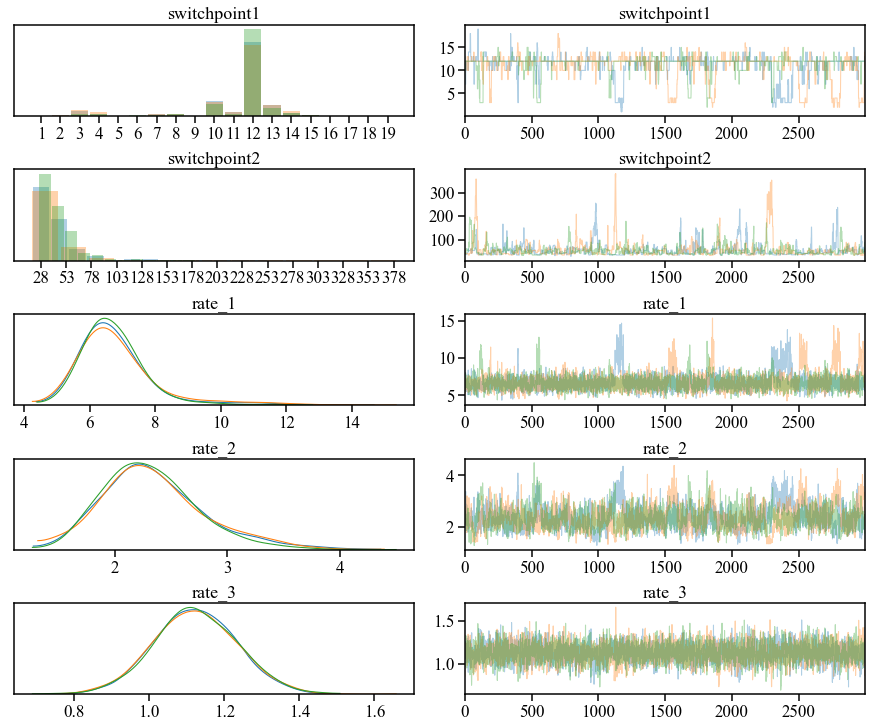

In [106]:
axes = pm.traceplot(trace)

plt.rcParams["font.family"] = "Times New Roman"

for axlist in axes:
    for ax in axlist:
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontname('Times New Roman') for label in labels]
        ax.tick_params(axis='both', length=7, labelsize=17, width=1.5)
        ax.title.set_fontsize(18)
        
        ax.spines["top"].set_linewidth(1.5)
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["right"].set_linewidth(1.5)
plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\7.png", dpi=1000)

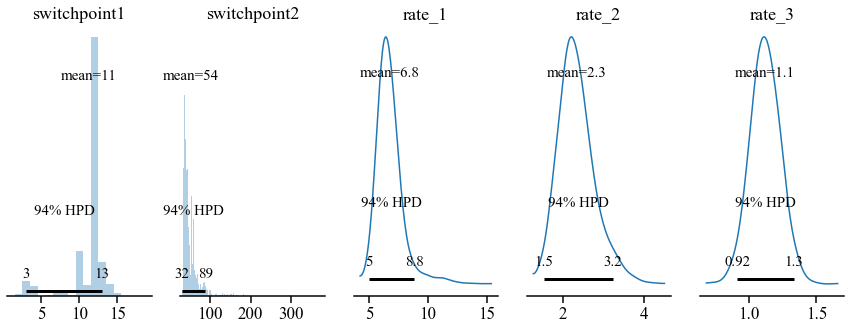

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

pm.plot_posterior(trace, var_names=['switchpoint1'], ax=ax[0])
pm.plot_posterior(trace, var_names=['switchpoint2'], ax=ax[1])
pm.plot_posterior(trace, var_names=['rate_1'], ax=ax[2])
pm.plot_posterior(trace, var_names=['rate_2'], ax=ax[3])
pm.plot_posterior(trace, var_names=['rate_3'], ax=ax[4])

for subplot in ax:
    labels = subplot.get_xticklabels() + subplot.get_yticklabels()
    [label.set_fontname('times new roman') for label in labels]
    subplot.tick_params(axis='x', length=7, labelsize=17, color='black', width=1.5)
    subplot.title.set_fontsize(18)
    subplot.spines["bottom"].set_color("black")
    subplot.spines["bottom"].set_linewidth(1.5)
plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\8.png", dpi=1000)

In [108]:
pm.rhat(trace)

<xarray.Dataset>
Dimensions:       ()
Data variables:
    switchpoint1  float64 1.02
    switchpoint2  float64 1.004
    rate_1        float64 1.009
    rate_2        float64 1.008
    rate_3        float64 1.0

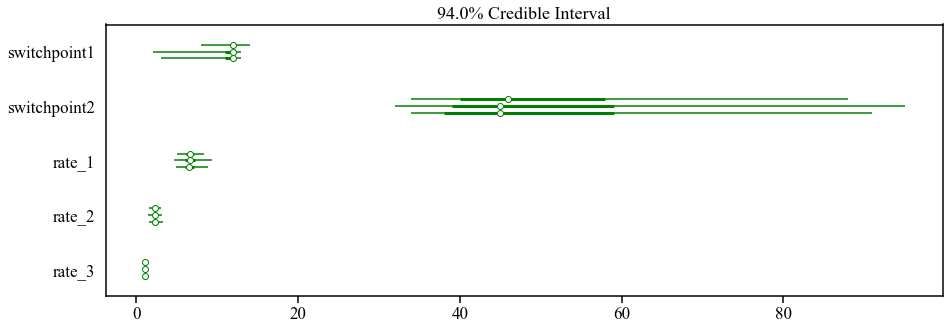

In [109]:
fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
pm.forestplot(trace, colors='green', markersize=8, ax=subplot)


labels = subplot.get_xticklabels() + subplot.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
subplot.tick_params(axis='both', length=7, labelsize=17, color='black', width=1.5)
subplot.title.set_fontsize(18)
subplot.spines["bottom"].set_color("black")
subplot.spines["bottom"].set_linewidth(1.5)
subplot.spines["top"].set_color("black")
subplot.spines["top"].set_linewidth(1.5)
subplot.spines['left'].set_visible(True)
subplot.spines["left"].set_color("black")
subplot.spines["left"].set_linewidth(1.5)
subplot.spines['right'].set_visible(True)
subplot.spines["right"].set_color("black")
subplot.spines["right"].set_linewidth(1.5)

plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\9.png", dpi=1000)

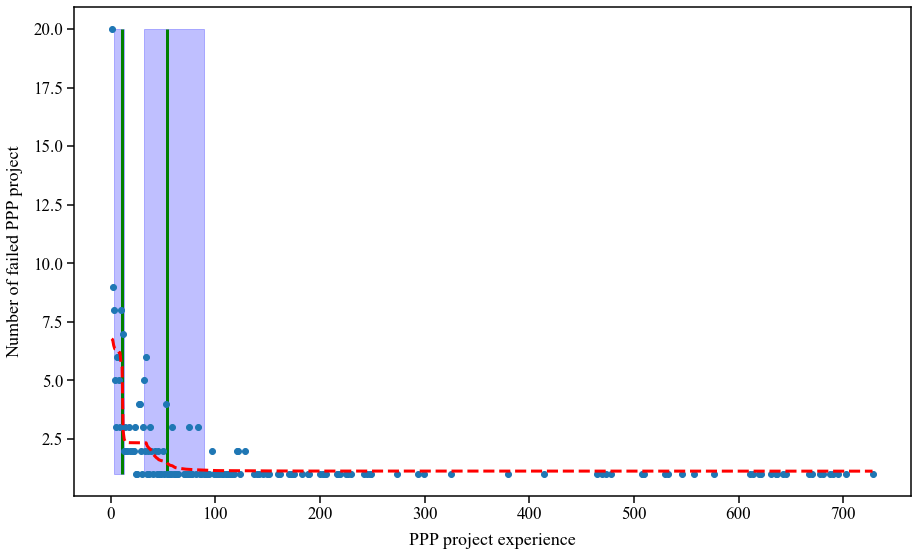

In [110]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(years, input_value, '.', markersize=12)

ax.set_ylabel("Number of failed PPP project", fontsize=18, fontname='times new roman', labelpad=10)
ax.set_xlabel("PPP project experience", fontsize=18, fontname='times new roman', labelpad=10)

ax.vlines(trace['switchpoint1'].mean().astype(int), input_value.min(), input_value.max(), color='g', linewidth=3)
ax.vlines(trace['switchpoint2'].mean().astype(int), input_value.min(), input_value.max(), color='g', linewidth=3)

average_failures = np.zeros_like(input_value, dtype='float')

for i, year in enumerate(years):
    idx1 = year < trace['switchpoint1']
    idx2 = (year >= trace['switchpoint1']) & (year <= trace['switchpoint2'])
    idx3 = year > trace['switchpoint2']
    average_failures[i] = (trace['rate_1'][idx1].sum() + trace['rate_2'][idx2].sum() + trace['rate_3'][idx3].sum()) / (len(trace) * trace.nchains)

sp_hpd1 = pm.hpd(trace['switchpoint1'])
sp_hpd2 = pm.hpd(trace['switchpoint2'])

plt.fill_betweenx(y=[input_value.min(), input_value.max()],
                  x1=sp_hpd1[0], x2=sp_hpd1[1], alpha=0.25, color='b')
plt.fill_betweenx(y=[input_value.min(), input_value.max()],
                  x1=sp_hpd2[0], x2=sp_hpd2[1], alpha=0.25, color='b')

labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('times new roman') for label in labels]
ax.tick_params(axis='both', length=7, labelsize=17, color='black', width=1.5)

ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["top"].set_color("black")
ax.spines["top"].set_linewidth(1.5)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_color("black")
ax.spines["right"].set_linewidth(1.5)

    
ax.plot(years, average_failures,  'r--', lw=3)
plt.savefig(r"D:\PPP\Thesis\Database\CSV format data by python\10.png", dpi=1000)

In [41]:
input_value

array([20,  9,  8,  5,  3,  6,  6,  5,  3,  8,  3,  7,  2,  3,  2,  2,  3,
        2,  2,  2,  2,  3,  1,  1,  4,  4,  2,  1,  3,  5,  2,  6,  1,  2,
        1,  3,  2,  1,  2,  1,  2,  1,  1,  2,  1,  4,  1,  1,  1,  1,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  3,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

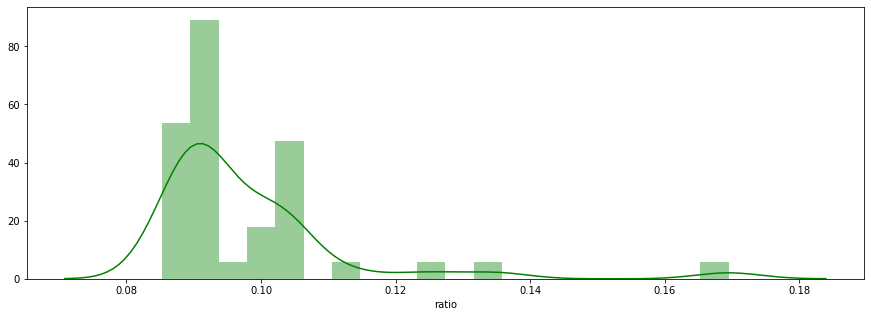

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(new_trial.ratio[:40], ax=ax, bins=20, color='green')

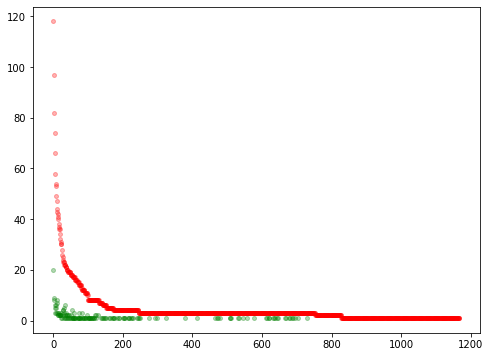

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(years1, input_value1, '.', markersize=8, alpha=0.3, c='red')
ax.plot(years, input_value, '.', markersize=8, alpha=0.3, c='green')

In [60]:
times1 = pd.DataFrame(input_value1, index=years1)
times = pd.DataFrame(input_value, index=years)

In [164]:
new_times = times1.merge(times, how='left', left_index=True, right_index=True)
new_times.columns = ['times1', 'times']
new_times.times1.fillna(0, inplace=True)
new_times.times.fillna(0, inplace=True)
new_times['ratio'] = new_times.times / new_times.times1
new_times = new_times[: 10]

In [165]:
new_times['others'] = new_times.times1 - new_times.times
new_times['ratio1'] = new_times.times / new_times.others

In [166]:
from sklearn.linear_model import LinearRegression

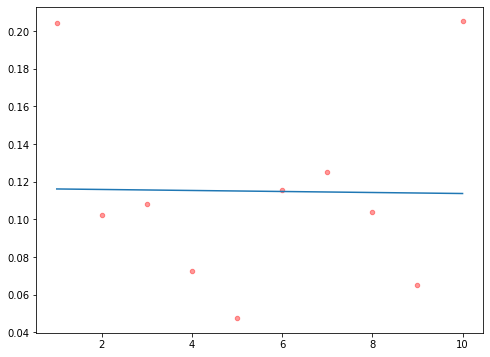

In [167]:
X, Y = new_times.index.values.reshape(-1, 1), new_times.ratio1.values.reshape(-1, 1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(new_times.index.values, new_times.ratio1.values, '.', markersize=9, alpha=0.4, c='red')
ax.plot( X, LinearRegression().fit(X, Y).predict(X))

In [42]:
extracted_frame = all_selected_projects[['country', 'FCY', 'status_n']]
new_extracted_frame = extracted_frame.groupby(['country', 'FCY', 'status_n']).size().unstack()

new_extracted_frame.fillna(0, inplace=True)
new_extracted_frame['contract_failure'] = new_extracted_frame['Cancelled'] + new_extracted_frame['Distressed']
new_extracted_frame.drop(columns=['Active', 'Concluded', 'Cancelled', 'Distressed'], inplace=True)

new_extracted_frame = new_extracted_frame.unstack()
result  = []
n = 0
for i in np.arange(new_extracted_frame.shape[0]):
    row = new_extracted_frame.iloc[i].values
    row = [x for x in row if ~np.isnan(x)]
    result.append(row)
    if n < len(row):
        n = len(row)
final_frame = pd.DataFrame(result, columns=np.arange(1, n+1))
failure_by_time = final_frame.sum()

In [43]:
failure_by_time

1     31.0
2     12.0
3     26.0
4     21.0
5     23.0
6     16.0
7     28.0
8     12.0
9     19.0
10    17.0
11    10.0
12     9.0
13     3.0
14     3.0
15     1.0
16     6.0
17     3.0
18     4.0
19     4.0
20     0.0
21     4.0
22     4.0
23    18.0
24     1.0
25     1.0
dtype: float64

In [10]:
new_data.groupby(['PPP', 'status_n']).size()

PPP          status_n  
Other PPI    Active         989
             Cancelled       73
             Concluded        2
             Distressed      13
PPP Project  Active        6626
             Cancelled      216
             Concluded      194
             Distressed      60
dtype: int64

In [14]:
level = new_data.groupby('country').size().to_frame()
level.columns = ['number']

In [15]:
level

,number
country,
Afghanistan,5
Albania,19
Algeria,28
Angola,8
Argentina,207
...,...
Vietnam,111
West Bank and Gaza,4
"Yemen, Rep.",7


In [23]:
level.loc[level.number < 12].shape

(71, 1)

In [24]:
level.loc[(level.number > 11) & (level.number < 55)].shape

(30, 1)

In [25]:
level.loc[level.number > 55].index.shape

(20,)

In [69]:
datatrial = pd.DataFrame(input_value, index=years)
datatrial.columns = ['column1']

In [70]:
datatrial

,column1
1,20
2,9
3,8
4,5
5,3
...,...
687,1
690,1
695,1
703,1


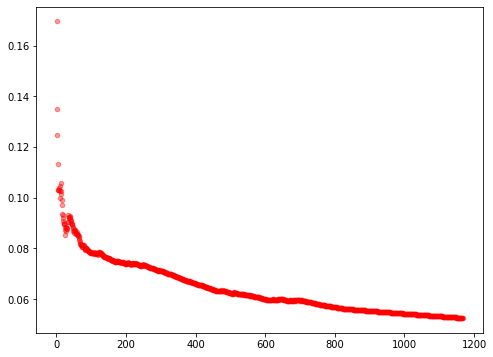

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(new_trial.index.values, new_trial.ratio.values, '.', markersize=9, alpha=0.4, c='red')

In [65]:
datatrial1 = pd.DataFrame(input_value1, index=years1)
datatrial1.columns = ['column1']

In [66]:
datatrial1

,column1
1,118
2,97
3,82
4,74
5,66
...,...
1163,1
1164,1
1165,1
1166,1


In [68]:
datatrial

,column1,newcolumn
1,20,20
2,9,29
3,8,37
4,5,42
5,3,45
...,...,...
687,1,272
690,1,273
695,1,274
703,1,275


In [73]:
new_trial = datatrial1.merge(datatrial, how='left', left_index=True, right_index=True)

In [76]:
new_trial.column1_y.fillna(0, inplace=True)

In [77]:
new_trial['column1'] = new_trial.column1_x.cumsum()
new_trial['column2'] = new_trial.column1_y.cumsum()

In [79]:
new_trial['ratio'] = new_trial['column2'] / new_trial['column1']